In [1]:
import pandas as pd #used for importing
import math as m 
import numpy as np #used for matrix manipulation
from scipy.interpolate import interp2d #used for interpolating Perple_X outputs
from scipy.interpolate import interp1d #used for interpolating evenly spaced P-T conditions from modeling
import colorcet as cc
#import cmcrameri.cm as cmc
import matplotlib.pyplot as plt #plotting package
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #used for defining user-created colormap
import matplotlib.colors as col

In [2]:
wedge_mat=np.zeros((6,600,225,100))
slab_mat=np.empty((2,600,100))
slab_mat[:]=np.nan
wedge_field='wedge_PT/text_files/{}.wedgeT.txt'
slabtop='wedge_PT/text_files/{}.slabtop.txt'

In [3]:
#load grid data for wedge PT
for i in range(0,100):
    wedge=pd.read_csv(wedge_field.format(i),header=None, delim_whitespace=True)
    slab=pd.read_csv(slabtop.format(i),header=None, delim_whitespace=True)
    
    wedge=wedge.to_numpy()
    slab=slab.to_numpy()
    
    wedge=np.flipud(wedge)
    slab=np.flipud(slab)
    
    X=np.reshape(wedge[:,0],(225,600))
    Y=np.reshape(wedge[:,1],(225,600))
    T=np.reshape(wedge[:,2],(225,600))
    
    X=np.fliplr(X)
    Y=np.fliplr(Y)
    T=np.fliplr(T)
    
    wedge_mat[0,:,:,i]=X.T
    wedge_mat[1,:,:,i]=Y.T
    wedge_mat[2,:,:,i]=T.T
    
    lng=slab.shape[0]
    slab_mat[:,0:lng,i]=slab[:,:].T
    

In [4]:
wedge_mat[3,:,:,:]=wedge_mat[1,:,:,:]*.03234 #convert depth to pressure

In [5]:
adiabat=0.3*wedge_mat[1,:,:,:] #add abiatic temperature gradient

In [6]:
wedge_mat[2,:,:,:]=wedge_mat[2,:,:,:]+adiabat

Text(0.5, 0, 'Temperature (°C)')

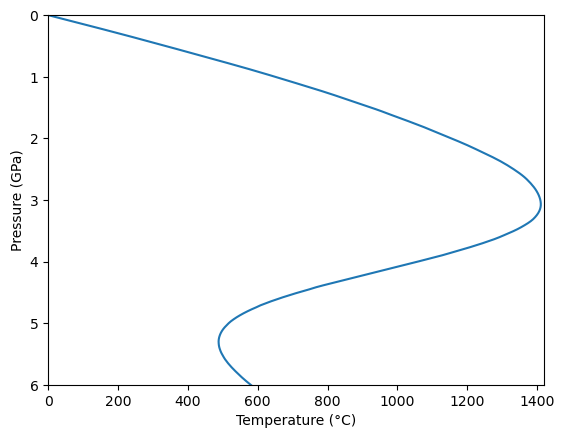

In [7]:
#test plot of temperature through forearc and into slab
plt.plot(wedge_mat[2,250,:,85],wedge_mat[3,250,:,85])
plt.ylim(6,0)
plt.xlim(0,1420)
plt.ylabel('Pressure (GPa)')
plt.xlabel('Temperature (\u00b0C)')
#plt.savefig('subarc_PT.png')

In [8]:
print(wedge_mat[2,250,43:135,85])

[ 870.3406  887.4748  904.4303  921.1235  937.706   953.8022  968.8417
  984.2749 1000.1744 1015.7356 1031.1061 1046.2363 1061.2338 1076.163
 1090.1172 1103.7227 1118.0529 1132.2214 1146.0856 1159.8591 1173.4713
 1186.8608 1199.965  1212.5495 1224.7427 1236.8472 1248.9854 1260.9946
 1272.6891 1283.9483 1294.7148 1304.911  1314.5235 1323.6957 1332.5662
 1341.1034 1349.1839 1356.7511 1363.7316 1370.0148 1375.7693 1381.1305
 1386.1387 1390.7422 1394.8884 1398.5379 1401.7541 1404.4986 1406.7508
 1408.4953 1409.6915 1410.345  1410.3982 1409.6797 1408.1649 1405.8594
 1402.7116 1398.7118 1393.9133 1388.3015 1381.401  1373.1792 1363.8867
 1353.9809 1343.2054 1331.3326 1318.5071 1304.9733 1291.5348 1276.775
 1260.5492 1243.5557 1225.7689 1207.3194 1188.0616 1167.9291 1148.4473
 1128.5788 1106.845  1084.7175 1062.1777 1039.2652 1016.1484  992.4836
  969.3561  947.6683  924.5428  901.069   877.8275  854.8767  832.2022
  809.9454]


Text(0, 0.5, 'Depth (km)')

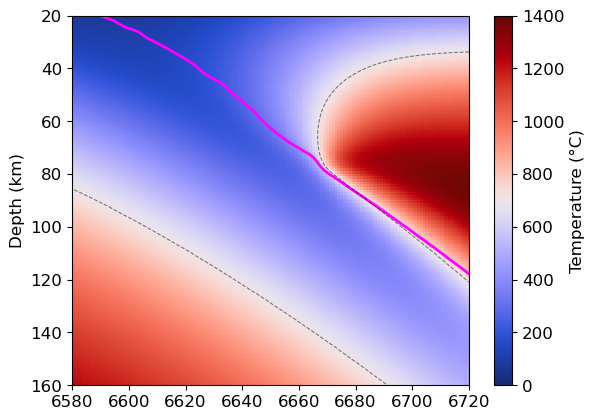

In [9]:
#plot cross section of thermal state
plt.rcParams.update({'font.size': 12})

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1400)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')
#cmap=cmc.roma_r

plt.pcolormesh(wedge_mat[0,:,:,85],wedge_mat[1,:,:,85],wedge_mat[2,:,:,85],cmap=cmap,norm=norm_temp)
plt.plot(slab_mat[0,:,85],slab_mat[1,:,85],c='magenta',lw=2)
plt.colorbar(label='Temperature (\u00b0C)')
CS=plt.contour(wedge_mat[0,:,:,85],wedge_mat[1,:,:,85],wedge_mat[2,:,:,85], levels=[700],colors='black',linewidths=0.75,linestyles='--',alpha=0.5)
CL=plt.clabel(CS)
plt.ylim(160,20)
plt.xlim(6580,6720)
plt.ylabel('Depth (km)')
#plt.xticks(color='w')
#plt.text(6581,158,'No V.E.',style='italic')
#plt.text(6670,30,'32.1 Myr',fontsize=18,fontweight='bold')
#plt.savefig('wedge_PT/figures/32.1Myr_700.pdf')

Text(7375, 30, '5.6 Myr')

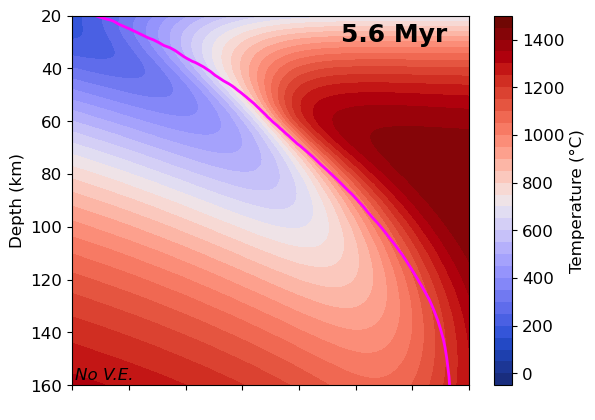

In [10]:
plt.rcParams.update({'font.size': 12})

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1450)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')

plt.contourf(wedge_mat[0,:,:,8],wedge_mat[1,:,:,8],wedge_mat[2,:,:,8],cmap=cmap,levels=30)
plt.plot(slab_mat[0,:,8],slab_mat[1,:,8],c='magenta',lw=2)
plt.ylim(160,20)
plt.xlim(7280,7420)
plt.ylabel('Depth (km)')
plt.xticks(color='w')
plt.colorbar(label='Temperature (\u00b0C)')
plt.text(7281,158,'No V.E.',style='italic')
plt.text(7375,30,'5.6 Myr',fontsize=18,fontweight='bold')
#plt.savefig('wedge_PT/figures/5.6Myr.png')

In [11]:
#readin H2O and density from perplex
b_h2o=pd.read_csv('wedge_PT/niu_perid_h2o_rho.tab', delim_whitespace=True)
b_h2o=b_h2o.to_numpy()

Tppx=b_h2o[:,0]
Pppx=b_h2o[:,1]
h2o=b_h2o[:,2]
rho=b_h2o[:,3]

Tppx=Tppx.reshape(250,250)
Pppx=Pppx.reshape(250,250)
h2o=h2o.reshape(250,250)
rho=rho.reshape(250,250)

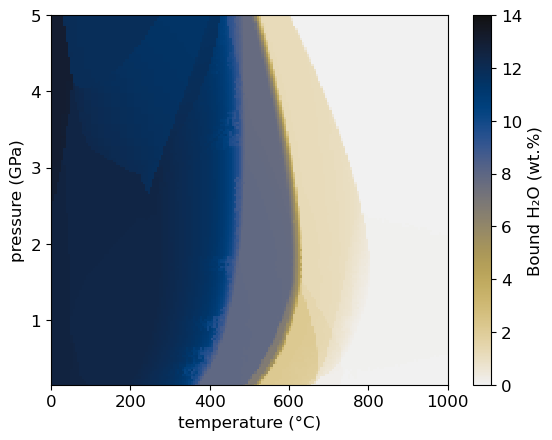

In [13]:
#plot water content in PT space
plt.rcParams.update({'font.size': 12})
cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
norm=plt.Normalize(0,14)
plt.pcolormesh(Tppx-273,Pppx/10000,h2o,cmap=cmap,norm=norm)
plt.xlabel('temperature (\u00b0C)')
plt.ylabel('pressure (GPa)')
plt.colorbar(label='Bound H\u2082O (wt.%)')
plt.ylim(0.15,5)
plt.xlim(0,1000)
#plt.savefig('wedge_PT/figures/serp_h2o_content.pdf')
plt.show()

In [14]:
#setup interpolation
F_h2o=interp2d(Tppx[0,:],Pppx[:,0],h2o)
F_rho=interp2d(Tppx[0,:],Pppx[:,0],rho)

In [15]:
#interpolate from perplex grid to thrmal state; takes a few minutes
for i in range(0,100):
    for j in range (0,600):
        for k in range (0,225):
            wedge_mat[4,j,k,i]=F_h2o(wedge_mat[2,j,k,i]+273.15,wedge_mat[3,j,k,i]*10000)
            wedge_mat[5,j,k,i]=F_rho(wedge_mat[2,j,k,i]+273.15,wedge_mat[3,j,k,i]*10000)

In [16]:
#constrain wedge extents: above slab depth of 30 to 120 km, cutoff backarc
fluid_mat=np.zeros((2,600,225,100))
for i in range(0,100):
    for j in range(30,120):
        beg_i=np.where(slab_mat[1,:,i]>=wedge_mat[1,0,j,i])[0][0]
        end_i=np.where(slab_mat[1,:,i]>=100)[0][0]
        k1=np.where(wedge_mat[0,:,j,i]>=slab_mat[0,beg_i,i])[0][0]
        k2=np.where(wedge_mat[0,:,j,i]>=slab_mat[0,end_i,i])[0][0]
        for k in range(k1,k2+1):
            if wedge_mat[4,k,j,i]>0.1:
                fluid_mat[0,k,j,i]=wedge_mat[4,k,j,i]/100*wedge_mat[5,k,j,i]*10**6
                fluid_mat[1,k,j,i]=1

In [17]:
##optional calculation of seismic parameters
##Vp calculation
#wedge_mat[5,:,:,:]=(wedge_mat[4,:,:,:]-30)/-3.7*(1000*wedge_mat[3,:,:,:]/200)**0.015+wedge_mat[2,:,:,:]*-0.0006

In [18]:
#calculate capacity through time (Tg/m)
capacity=np.zeros((100,1))
for i in range(0,100):
    capacity[i,0]=np.sum(fluid_mat[0,:,:,i])/1e9

In [19]:
#np.savetxt('forearc_h2o_capacity.txt',capacity) #save h2o capacity as function of time (Tg/m)

In [21]:
age=pd.read_csv('holt2e20/age_convergence.txt', header=None, usecols=[1], delim_whitespace=True)
age=age.to_numpy()
convergence=pd.read_csv('holt2e20/age_convergence.txt', header=None, usecols=[2], delim_whitespace=True)
convergence=convergence.to_numpy()

(0.0, 525.0)

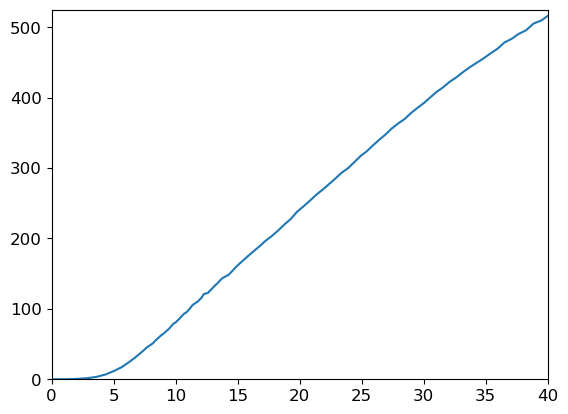

In [22]:
plt.rcParams.update({'font.size': 12})
plt.plot(age[0:100],capacity)
plt.xlim(0,40)
plt.ylim(0,525)

(array([6440., 6460., 6480., 6500., 6520., 6540., 6560.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

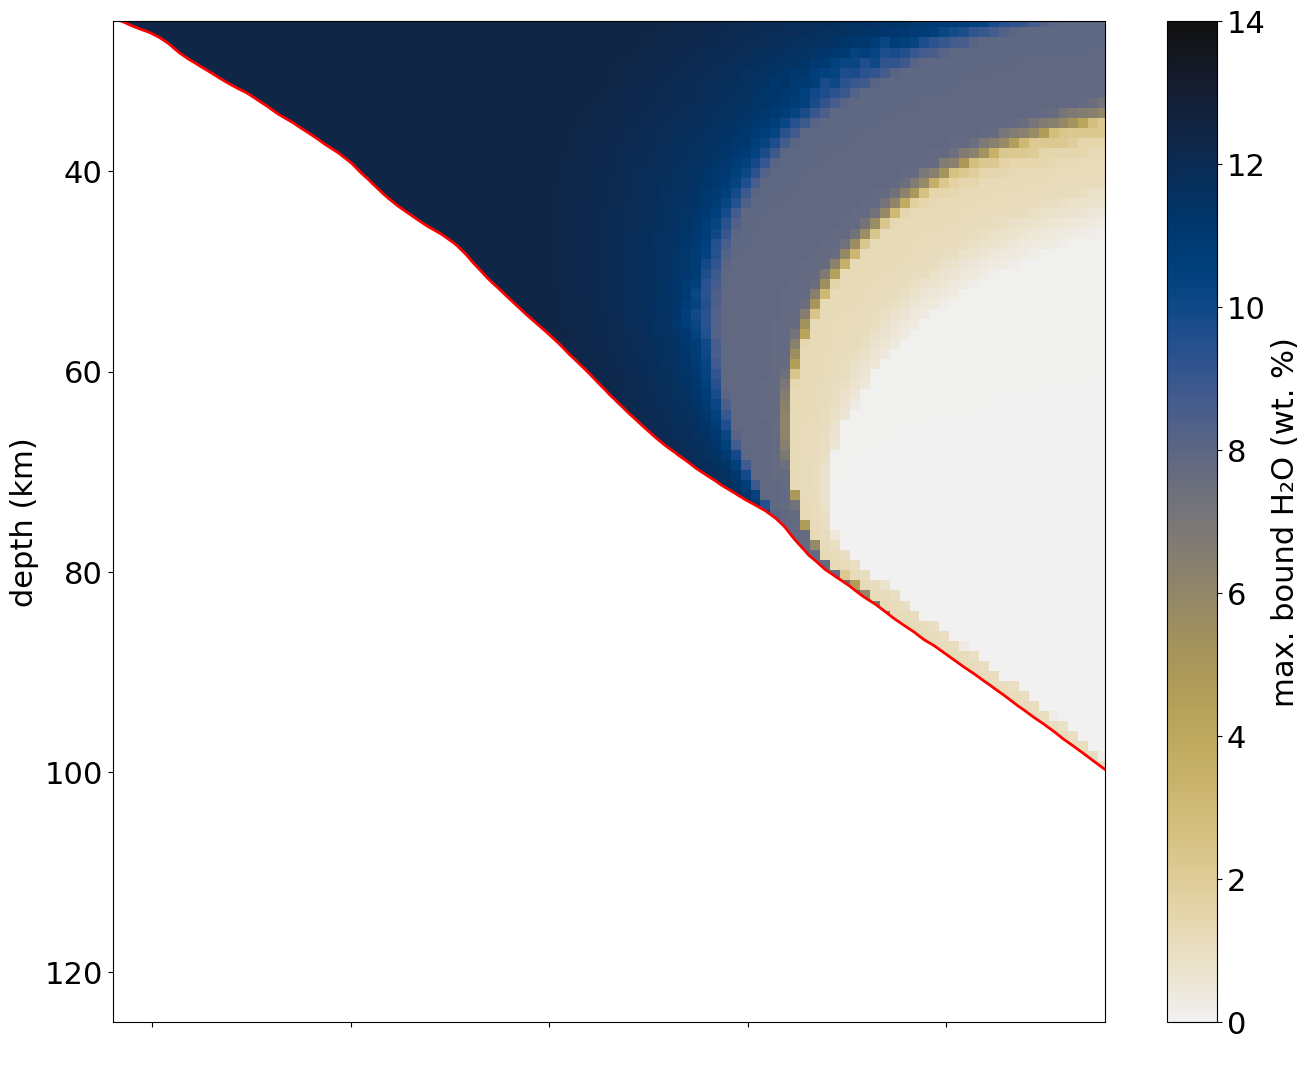

In [25]:
#plot cross section of H2O capacity at given timestep

ageind=99
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=[16,13]) 


min_ind=np.where(slab_mat[1,:,ageind]>=25)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+100

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
norm=plt.Normalize(0,14) 

plt.pcolormesh(wedge_mat[0,:,:,ageind],wedge_mat[1,:,:,ageind],wedge_mat[4,:,:,ageind],cmap=cmap,norm=norm)
plt.colorbar(label='max. bound H\u2082O (wt. %)')
plt.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='red',lw=2)
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],slab_mat[1,:,ageind]+1,color='red')
plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],125,color='white')
plt.ylim(125,25)
plt.xlim(xstart,xend)
plt.ylabel('depth (km)')
plt.xticks(color='w')
#plt.xlabel('distance from model edge (km)')
#plt.suptitle('Model Age = 32.1 Myr')
#plt.savefig('wedge_PT/forearc_h2o_max_32.1myr.pdf')

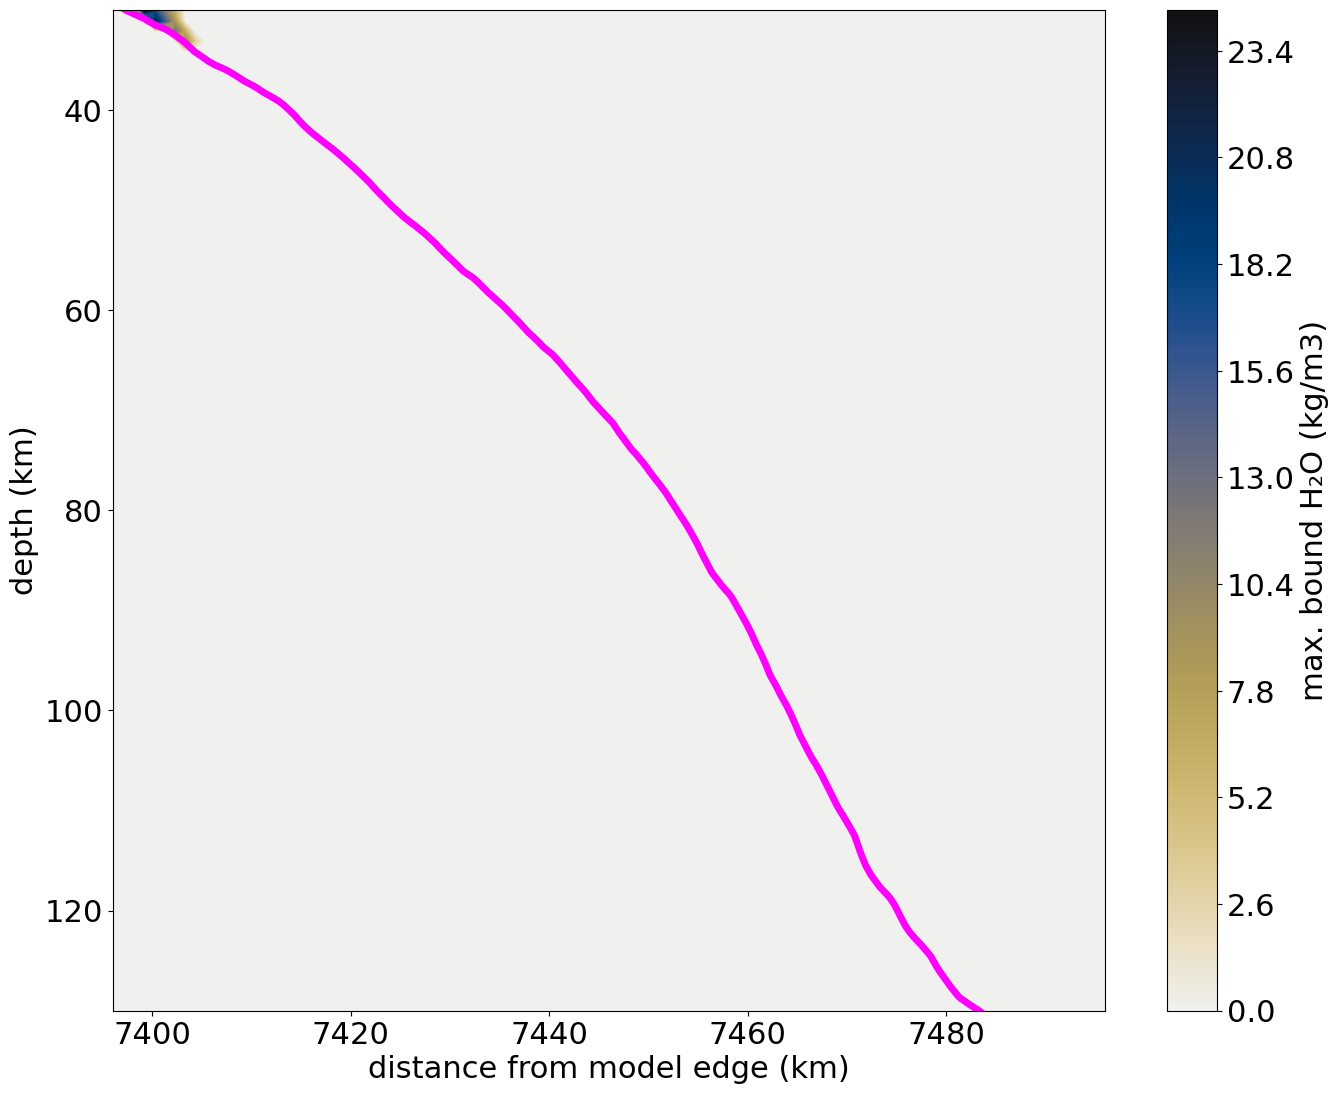

In [28]:
ageind=2
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=[16,13]) 


min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+100

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
cmap_rev=cmap.reversed() 
norm=plt.Normalize(0,350) 

plt.contourf(wedge_mat[0,:,:,ageind],wedge_mat[1,:,:,ageind],fluid_mat[0,:,:,ageind]/10**6,cmap=cmap,levels=128)
plt.colorbar(label='max. bound H\u2082O (kg/m3)')
plt.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=5)
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],slab_mat[1,:,ageind]+1,color='red')
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind]+1,175,color='white')
plt.ylim(130,30)
plt.xlim(xstart,xend)
plt.ylabel('depth (km)')
plt.xlabel('distance from model edge (km)')
#plt.suptitle('Model Age = 32.1 Myr')
plt.show()
#plt.savefig('wedge_PTs/forearc_h2o_max_32.1myr.png')

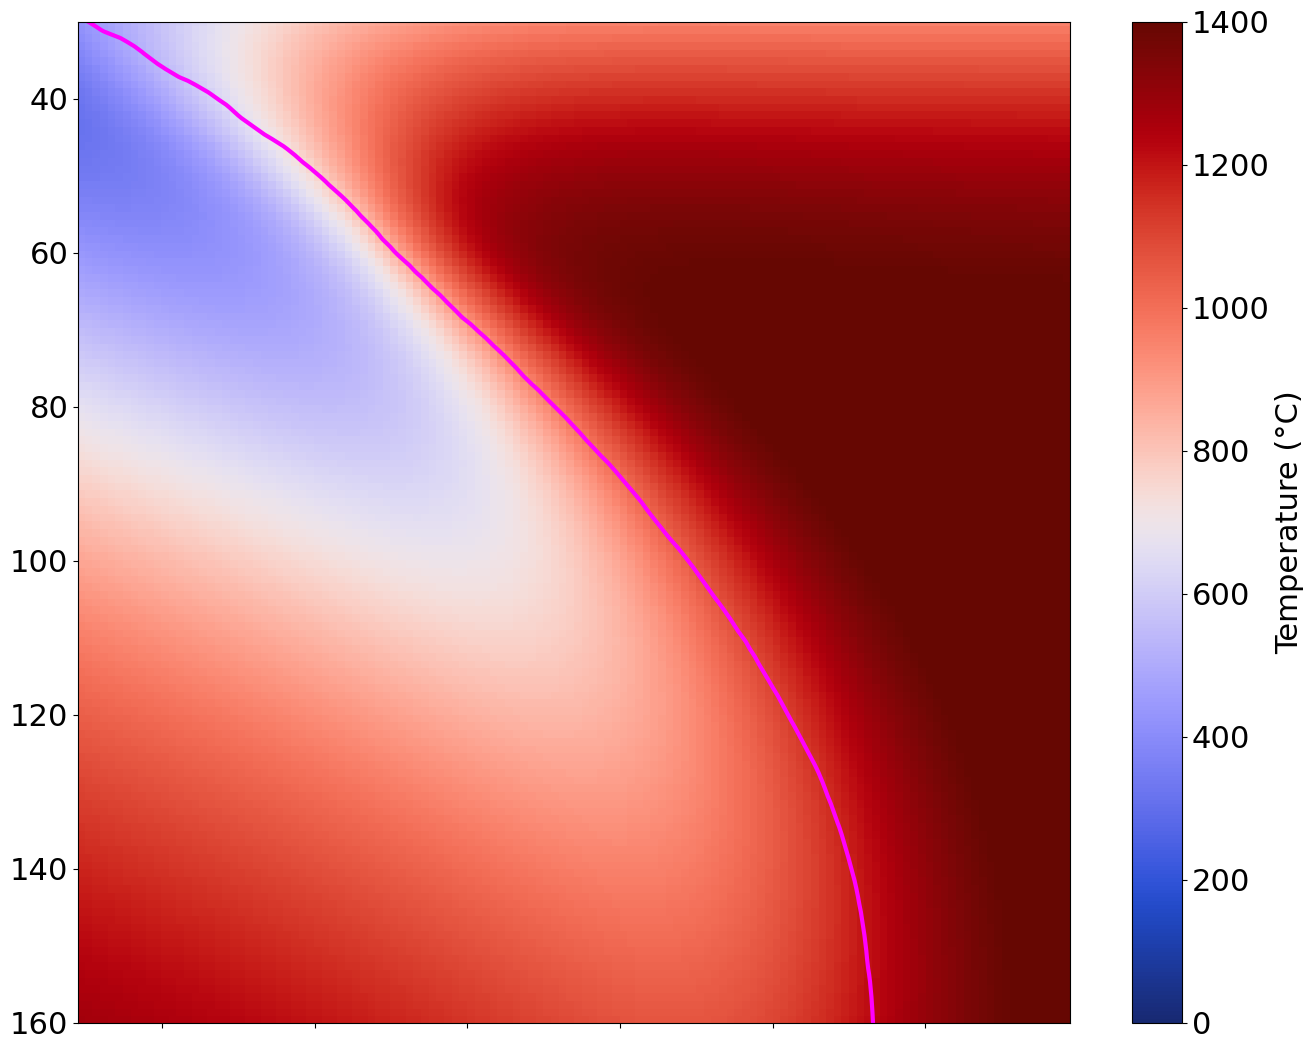

In [30]:
##Creates animations through time of slab properties with a moving X-axis. Approximately a 1:1 X:Y scale. For any new
##animation the colorbar must be reset both in terms of which one and in terms of range. 

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1400)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')

from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
ageind=8

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

label='time = {} Myr'                    ##allows for a resetting label with animation
sublab='convergence = {} cm/yr'         ##allows for a resetting sublabel with animation


norm=plt.Normalize(0,13)        ##range of values to be shaded with low values being a tranparent gray


fig, ax=plt.subplots(figsize=[16,13]) ##sets figure size, close to 1:1
ax.set_xlim(xstart,xend)
ax.set_ylim(160,30)
ax.axes.xaxis.set_ticklabels([])
x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[2,:,:,ageind]


t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm_temp)
fig.colorbar(t_plot, label='Temperature (\u00b0C)')
t_plot=ax.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)

#ax.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],160,color='white')

##animation function. Needs to redefine X,Y,Z data, X, Y axes and labels, and call the pcolormesh funtion every time
def animat(i):

    k=age[i,0]
    kk=convergence[i,0]
    
    min_ind=np.where(slab_mat[1,:,i]>=30)[0][0]-1
    xstart=m.floor(slab_mat[0,min_ind,i])
    xend=xstart+130
    
    x_data=wedge_mat[0,:,:,i]
    y_data=wedge_mat[1,:,:,i]
    z_data=wedge_mat[2,:,:,i]
    
    ax.clear()
    
    ax.set_xlim(xstart,xend)
    ax.set_ylim(160,30)
    fig.suptitle(label.format(k))
    ax.set_title(sublab.format(kk))
    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylabel('depth (km)')
    t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm_temp)
    t_plot=ax.plot(slab_mat[0,:,i],slab_mat[1,:,i],c='magenta',lw=3)
    t_plot=ax.contour(x_data, y_data, z_data, levels=[700],colors='black',linewidths=2,linestyles='--',alpha=0.5)
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],slab_mat[1,:,i]+1,color='red')
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i]+1,160,color='white')
    
    
    return t_plot,

anim = FuncAnimation(fig, func=animat, frames=np.arange(8,100), interval=200, repeat_delay=2000)


plt.show()
#anim.save("wedge_PT/forearc_thermal_fast_diverging.gif") #cannot see figure in notebook, need to save to gif.

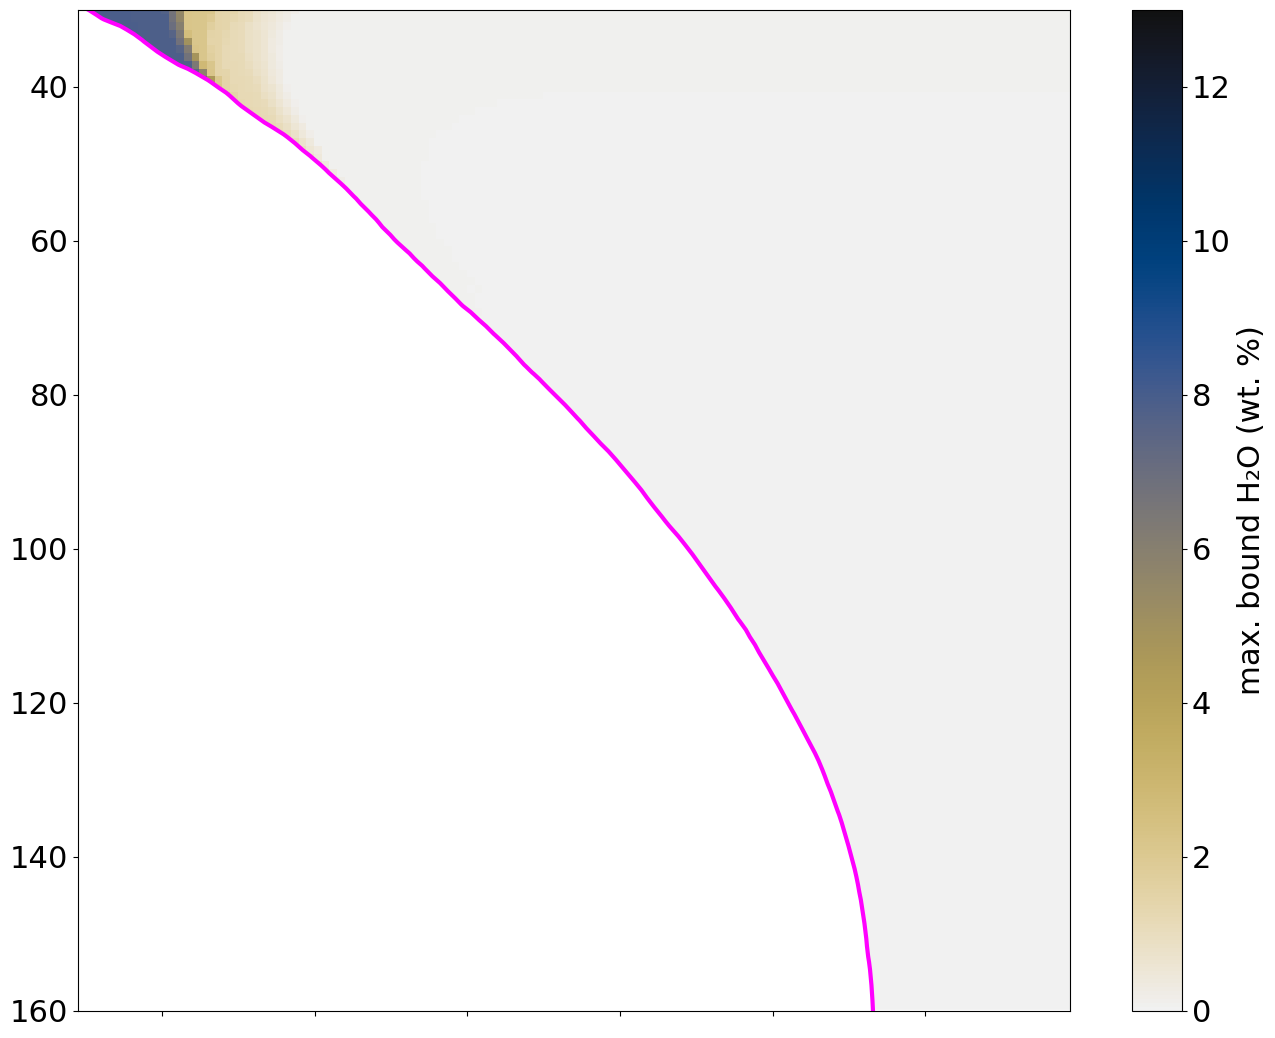

In [33]:
##Creates animations through time of slab properties with a moving X-axis. Approximately a 1:1 X:Y scale. For any new
##animation the colorbar must be reset both in terms of which one and in terms of range. 

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r') 

from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
ageind=8

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

label='time = {} Myr'                    ##allows for a resetting label with animation
sublab='convergence = {} cm/yr'         ##allows for a resetting sublabel with animation


norm=plt.Normalize(0,13)        ##range of values to be shaded with low values being a tranparent gray


fig, ax=plt.subplots(figsize=[16,13]) ##sets figure size, close to 1:1
ax.set_xlim(xstart,xend)
ax.set_ylim(160,30)
ax.axes.xaxis.set_ticklabels([])
x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[4,:,:,ageind]


t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
fig.colorbar(t_plot, label='max. bound H\u2082O (wt. %)')
t_plot=ax.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)
ax.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],160,color='white')

##animation function. Needs to redefine X,Y,Z data, X, Y axes and labels, and call the pcolormesh funtion every time
def animat(i):

    k=age[i,0]
    kk=convergence[i,0]
    
    min_ind=np.where(slab_mat[1,:,i]>=30)[0][0]-1
    xstart=m.floor(slab_mat[0,min_ind,i])
    xend=xstart+130
    
    x_data=wedge_mat[0,:,:,i]
    y_data=wedge_mat[1,:,:,i]
    z_data=wedge_mat[4,:,:,i]
    
    ax.clear()
    
    ax.set_xlim(xstart,xend)
    ax.set_ylim(160,30)
    fig.suptitle(label.format(k))
    ax.set_title(sublab.format(kk))
    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylabel('depth (km)')
    t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
    t_plot=ax.plot(slab_mat[0,:,i],slab_mat[1,:,i],c='magenta',lw=3)
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],slab_mat[1,:,i]+1,color='red')
    ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],160,color='white')
    
    
    return t_plot,

anim = FuncAnimation(fig, func=animat, frames=np.arange(9,100), interval=150, repeat_delay=2000)


plt.show()
#anim.save("forearc_capacity.gif") #cannot see figure in notebook, need to save to gif.

C:\Users\epste\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


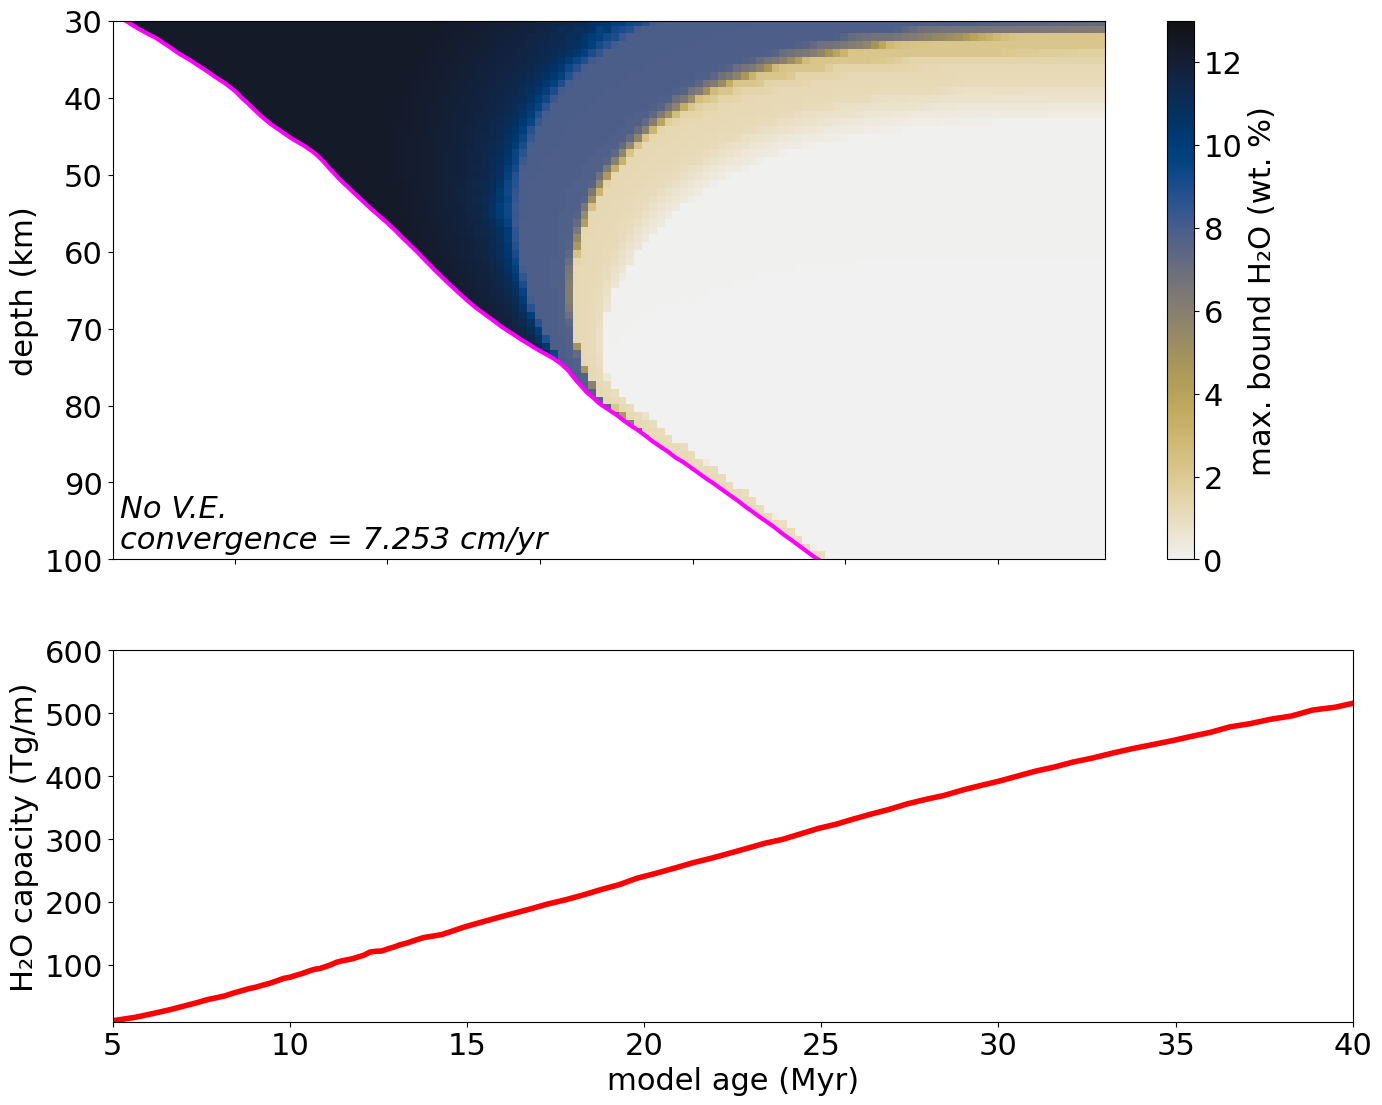

In [31]:
sublab='convergence = {} cm/yr'
kk=7.253
cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r') 

ageind=99

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

norm=plt.Normalize(0,13)


x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[4,:,:,ageind]

fig, axs = plt.subplots(2,1, figsize=[16,13], gridspec_kw={'height_ratios':[1.48,1.02]})
ts=axs[0].pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
fig.colorbar(ts,ax=axs[0],label='max. bound H\u2082O (wt. %)')
axs[0].plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)
axs[0].fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],100,color='white')
axs[0].set_xlim(xstart,xend)
axs[0].set_ylim(100,30)
axs[0].set_ylabel('depth (km)')
axs[0].text(xstart+1,94.5,'No V.E.',style='italic')
axs[0].text(xstart+1,98.5,sublab.format(kk),style='italic')
axs[0].axes.xaxis.set_ticklabels([])


axs[1].plot(age[0:100],capacity, c='red', lw=4)
axs[1].set_xlim(5,40)
axs[1].set_ylim(10,600)
#axs[1].set_yscale("log")
axs[1].set_ylabel('H\u2082O capacity (Tg/m)')
axs[1].set_xlabel('model age (Myr)')

plt.show()

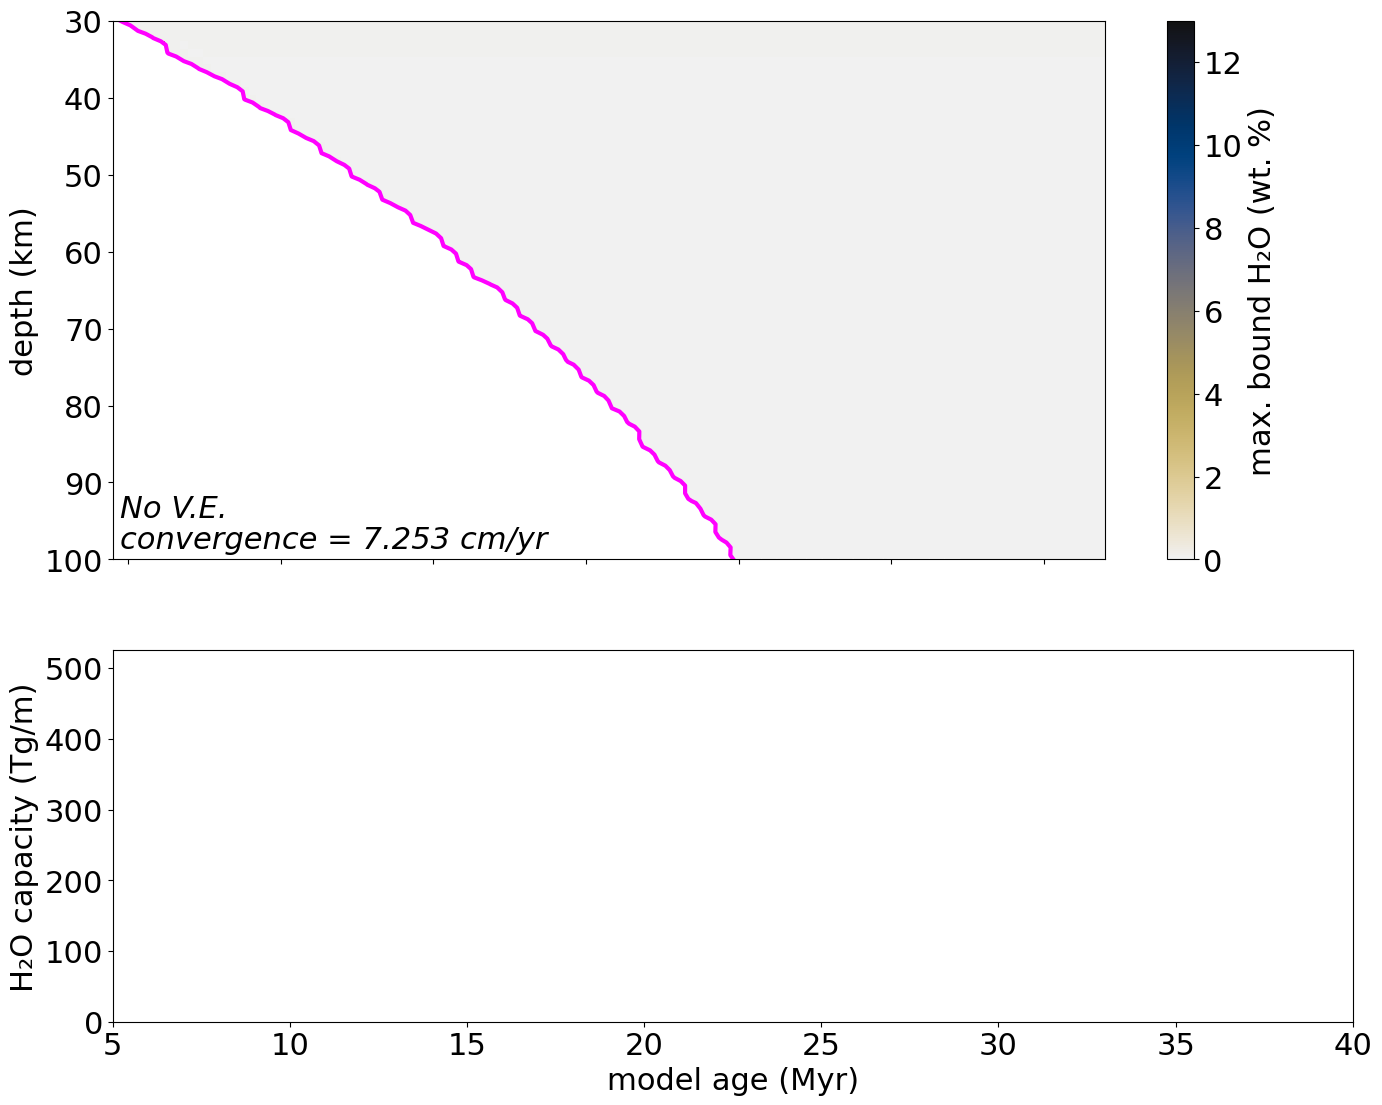

In [32]:
##Creates animations through time of slab properties with a moving X-axis. Approximately a 1:1 X:Y scale. For any new
##animation the colorbar must be reset both in terms of which one and in terms of range. 

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r') 

from matplotlib.animation import FuncAnimation
ageind=0

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

sublab='convergence = {} cm/yr' 
label='time = {} Myr'##allows for a resetting sublabel with animation


norm=plt.Normalize(0,13)        ##range of values to be shaded with low values being a tranparent gray

x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[4,:,:,ageind]

fig, axs = plt.subplots(2,1, figsize=[16,13], gridspec_kw={'height_ratios':[1.48,1.02]})
ts=axs[0].pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
fig.colorbar(ts,ax=axs[0],label='max. bound H\u2082O (wt. %)')
axs[0].plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)
axs[0].fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],100,color='white')
axs[0].set_xlim(xstart,xend)
axs[0].set_ylim(100,30)
axs[0].set_ylabel('depth (km)')
axs[0].text(xstart+1,94.5,'No V.E.',style='italic')
axs[0].text(xstart+1,98.5,sublab.format(kk),style='italic')
axs[0].axes.xaxis.set_ticklabels([])


axs[1].plot(age[0:ageind],capacity[0:ageind], c='red', lw=4)
axs[1].set_xlim(5,40)
axs[1].set_ylim(0,525)
#axs[1].set_yscale("log")
axs[1].set_ylabel('H\u2082O capacity (Tg/m)')
axs[1].set_xlabel('model age (Myr)')

##animation function. Needs to redefine X,Y,Z data, X, Y axes and labels, and call the pcolormesh funtion every time
def animat(i):

    kk=round(convergence[i,0],1)
    #k=round(age[i,0],1)
    
    min_ind=np.where(slab_mat[1,:,i]>=30)[0][0]-1
    xstart=m.floor(slab_mat[0,min_ind,i])
    xend=xstart+130
    
    max_depth=np.where(slab_mat[1,:,i]>=100)[0][0]-1
    max_dist=m.floor(slab_mat[0,max_depth,i])
    
    x_data=wedge_mat[0,:,:,i]
    y_data=wedge_mat[1,:,:,i]
    z_data=wedge_mat[4,:,:,i]
    
    axs[0].clear()

    ts=axs[0].pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
    #fig.colorbar(ts,ax=axs[0],label='max. bound H\u2082O (wt. %)')
    axs[0].plot(slab_mat[0,:,i],slab_mat[1,:,i],c='magenta',lw=3)
    axs[0].fill_between(slab_mat[0,:,i],slab_mat[1,:,i],100,color='white')
    axs[0].fill_between(np.arange(max_dist,xend+1),55,color='white')
    axs[0].set_xlim(xstart,xend)
    axs[0].set_ylim(100,30)
    axs[0].set_ylabel('depth (km)')
    axs[0].text(xstart+115,98.5,'No V.E.',style='italic')
    axs[0].text(xstart+1,98.5,sublab.format(kk),style='italic')
    #axs[0].text(xstart+1,89.5,label.format(k),style='italic')
    axs[0].axes.xaxis.set_ticklabels([])
    axs[0].set_xticks([])


    axs[1].plot(age[8:i+1],capacity[8:i+1], c='red', lw=4)
    axs[1].set_xlim(5,40)
    axs[1].set_ylim(0,525)
    #axs[1].set_yscale("log")
    axs[1].set_ylabel('H\u2082O capacity (Tg/m)')
    axs[1].set_xlabel('model age (Myr)')
    
    
    return fig,

anim = FuncAnimation(fig, func=animat, frames=np.arange(9,100), interval=200, repeat_delay=2000)


plt.show()
#anim.save("Fig_6_anim_linear_test.gif") #cannot see figure in notebook, need to save to gif.